<a href="https://colab.research.google.com/github/jieun0441/XMC/blob/main/SI_Figure_1_1_2026_Jan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seoul data analysis


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# ============================================
# Cell 1 — Load populations and plot histograms (counts + normalized)
# Files:
#   - population_Seoul_426dong_2023.xlsx  (Sheet1)
# Columns:
#   dong_cd, household, regist_pop, defacto_pop
# Notes:
#   - We'll mainly use 'defacto_pop' downstream.
# ============================================

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ----------- Config -----------
data_dir = "/content/drive/MyDrive/FMC_Data/Sharing_to_Public"  # change if your files are elsewhere
pop_file = os.path.join(data_dir, "population_Seoul_426dong_2023.xlsx")
pop_sheet = "Sheet1"

# Matplotlib defaults
plt.rcParams.update({
    "figure.dpi": 130,
    "axes.grid": True,
    "grid.alpha": 0.25,
    "font.size": 7,
    "axes.spines.top": False,
    "axes.spines.right": False,
})

# ----------- Load -----------
df_pop = pd.read_excel(pop_file, sheet_name=pop_sheet, engine="openpyxl")

# Standardize column names and types
df_pop = df_pop.rename(columns={
    "dong_cd": "dong_cd",
    "household": "household",
    "regist_pop": "regist_pop",
    "defacto_pop": "defacto_pop"
})
# Ensure IDs are strings (important for merges)
df_pop["dong_cd"] = df_pop["dong_cd"].astype(str)

# Basic sanity checks
assert {"dong_cd", "household", "regist_pop", "defacto_pop"}.issubset(df_pop.columns)
n_dong = df_pop["dong_cd"].nunique()
print(f"[Cell 1] Loaded populations for {n_dong} dongs.")

# ----------- Totals (requested) -----------
tot_households = float(df_pop["household"].sum())      # [NEW]
tot_regist     = float(df_pop["regist_pop"].sum())     # [NEW]
tot_defacto    = float(df_pop["defacto_pop"].sum())    # [NEW]

print("[Cell 1] Totals:")                               # [NEW]
print(f" - Households total     : {tot_households:,.0f}")  # [NEW]
print(f" - Registered pop total : {tot_regist:,.0f}")      # [NEW]
print(f" - De facto pop total   : {tot_defacto:,.0f}")     # [NEW]


[Cell 1] Loaded populations for 426 dongs.
[Cell 1] Totals:
 - Households total     : 4,463,385
 - Registered pop total : 9,668,008
 - De facto pop total   : 10,446,532


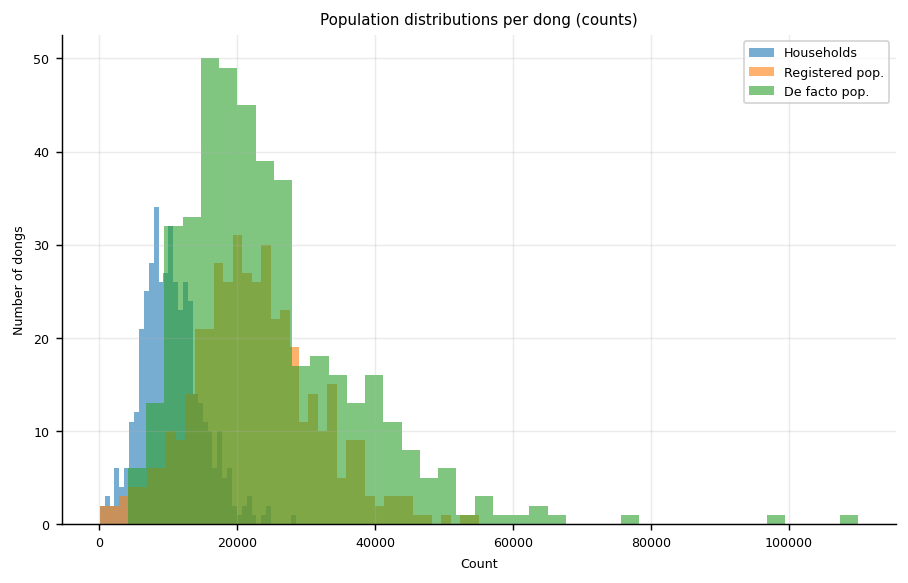

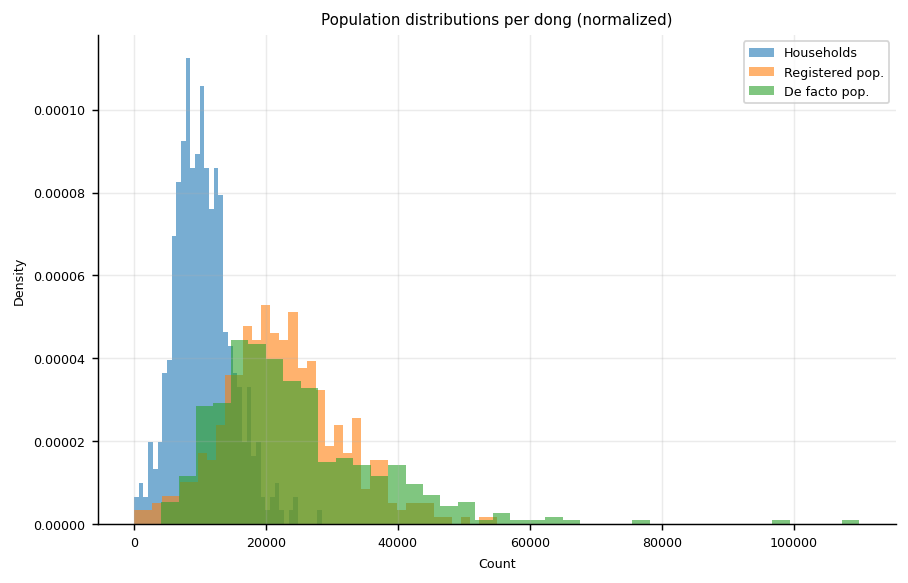

In [3]:

# ----------- Histograms (counts) -----------
fig, ax = plt.subplots(1, 1, figsize=(7, 4.5))
bins = 40

ax.hist(df_pop["household"].dropna().values, bins=bins, alpha=0.6, label="Households")
ax.hist(df_pop["regist_pop"].dropna().values, bins=bins, alpha=0.6, label="Registered pop.")
ax.hist(df_pop["defacto_pop"].dropna().values, bins=bins, alpha=0.6, label="De facto pop.")

ax.set_xlabel("Count")
ax.set_ylabel("Number of dongs")
ax.set_title("Population distributions per dong (counts)")
ax.legend()
plt.tight_layout()
#fig.savefig(os.path.join(data_dir, "histogram_population_counts.pdf"))
#fig.savefig(os.path.join(data_dir, "histogram_population_counts.jpg"), dpi=300)
plt.show()

# ----------- Histograms (normalized densities) -----------
fig, ax = plt.subplots(1, 1, figsize=(7, 4.5))         # [NEW]
ax.hist(df_pop["household"].dropna().values, bins=bins, alpha=0.6, density=True, label="Households")   # [NEW]
ax.hist(df_pop["regist_pop"].dropna().values, bins=bins, alpha=0.6, density=True, label="Registered pop.")  # [NEW]
ax.hist(df_pop["defacto_pop"].dropna().values, bins=bins, alpha=0.6, density=True, label="De facto pop.")   # [NEW]
ax.set_xlabel("Count")                                  # [NEW]
ax.set_ylabel("Density")                                # [NEW]
ax.set_title("Population distributions per dong (normalized)")  # [NEW]
ax.legend()                                             # [NEW]
plt.tight_layout()                                      # [NEW]
#fig.savefig(os.path.join(data_dir, "histogram_population_normalized.pdf"))
#fig.savefig(os.path.join(data_dir, "histogram_population_normalized.jpg"), dpi=300)
plt.show()                                              # [NEW]


[Cell 2] Loaded distance tables:
 - same=0          : (181476, 3)
 - same=radius     : (181476, 3)
 - without sameOD  : (181050, 3)


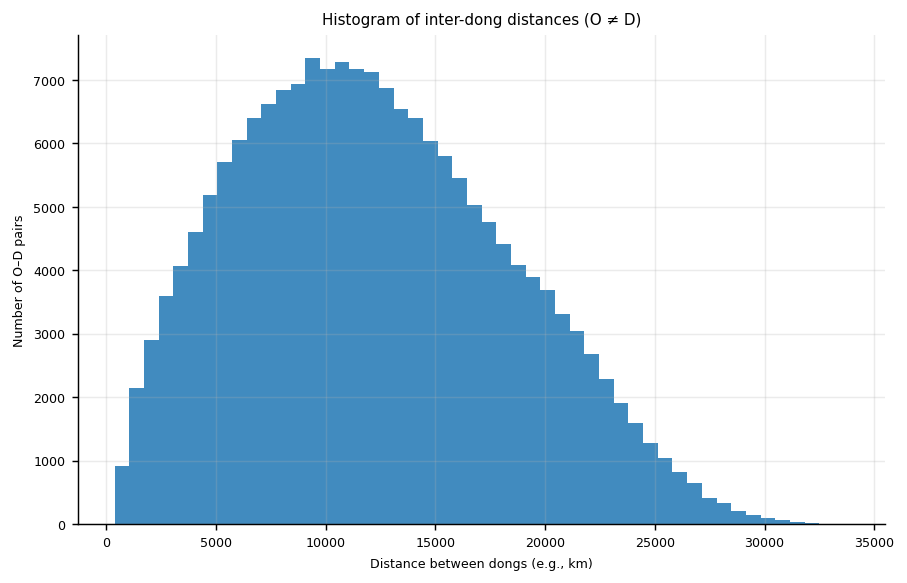

In [4]:
# ============================================
# Cell 2 — Load distance matrices; histogram of inter-dong distances
# Files:
# - Distance_Matrix_dong_to_dong_in_Seoul_MBData_code_system_if_same_filled_zero.csv
# - Distance_Matrix_dong_to_dong_in_Seoul_MBData_code_system_if_same_filled_radius_assuming_circle.csv
# - Distance_Matrix_dong_to_dong_in_Seoul_MBData_code_system_without_sameOD
#
# We will keep all three; for the histogram, we use the "radius_if_same" file
# and EXCLUDE self pairs (O != D).
# Columns: O_ADMDONG_CD, D_ADMDONG_CD, Distance
# ============================================

dist_zero_file = os.path.join(
    data_dir,
    "Distance_Matrix_dong_to_dong_in_Seoul_MBData_code_system_if_same_filled_zero.csv"
)
dist_radius_file = os.path.join(
    data_dir,
    "Distance_Matrix_dong_to_dong_in_Seoul_MBData_code_system_if_same_filled_radius_assuming_circle.csv"
)
dist_wo_same_file = os.path.join(
    data_dir,
    "Distance_Matrix_dong_to_dong_in_Seoul_MBData_code_system_without_sameOD"
)

usecols = ["O_ADMDONG_CD", "D_ADMDONG_CD", "Distance"]
dtype_ids = {"O_ADMDONG_CD": str, "D_ADMDONG_CD": str}

df_dist_zero   = pd.read_csv(dist_zero_file, usecols=usecols, dtype=dtype_ids)
df_dist_radius = pd.read_csv(dist_radius_file, usecols=usecols, dtype=dtype_ids)
# The third file may or may not have an extension; try to read flexibly
try:
    df_dist_wo_same = pd.read_csv(dist_wo_same_file, usecols=usecols, dtype=dtype_ids)
except Exception:
    # try with .csv appended
    try:
        df_dist_wo_same = pd.read_csv(dist_wo_same_file + ".csv", usecols=usecols, dtype=dtype_ids)
    except Exception as e:
        print(f"[Cell 2] Could not load without_sameOD file directly: {e}")
        df_dist_wo_same = None

print(f"[Cell 2] Loaded distance tables:")
print(f" - same=0          : {df_dist_zero.shape}")
print(f" - same=radius     : {df_dist_radius.shape}")
print(f" - without sameOD  : {None if df_dist_wo_same is None else df_dist_wo_same.shape}")

# Histogram of distances BETWEEN DIFFERENT dongs from the radius file
mask_inter = df_dist_radius["O_ADMDONG_CD"] != df_dist_radius["D_ADMDONG_CD"]
distvals = df_dist_radius.loc[mask_inter, "Distance"].astype(float).values

plt.figure(figsize=(7, 4.5))
plt.hist(distvals, bins=50, alpha=0.85)
plt.xlabel("Distance between dongs (e.g., km)")
plt.ylabel("Number of O–D pairs")
plt.title("Histogram of inter-dong distances (O ≠ D)")
plt.tight_layout()
plt.show()

# For later use, keep a fast distance pivot/matrix with same=radius
# Build index order from population table to keep consistent ordering
dong_ids = df_pop["dong_cd"].tolist()
id_to_idx = {d: i for i, d in enumerate(dong_ids)}
n = len(dong_ids)

# Initialize full distance matrix with NaN
dist_matrix = np.full((n, n), np.nan, dtype=float)
for _, row in df_dist_radius.iterrows():
    i = id_to_idx.get(row["O_ADMDONG_CD"])
    j = id_to_idx.get(row["D_ADMDONG_CD"])
    if i is not None and j is not None:
        dist_matrix[i, j] = float(row["Distance"])

# Sanity: self distances should be positive radii in the radius file
self_radii = np.diag(dist_matrix)
if np.any(~np.isfinite(self_radii)) or np.any(self_radii <= 0):
    print("[Cell 2][WARN] Some self distances (radii) missing or non-positive. Check input.")


[Cell 3] Trips loaded: non-work (181476, 3), work (176385, 3)


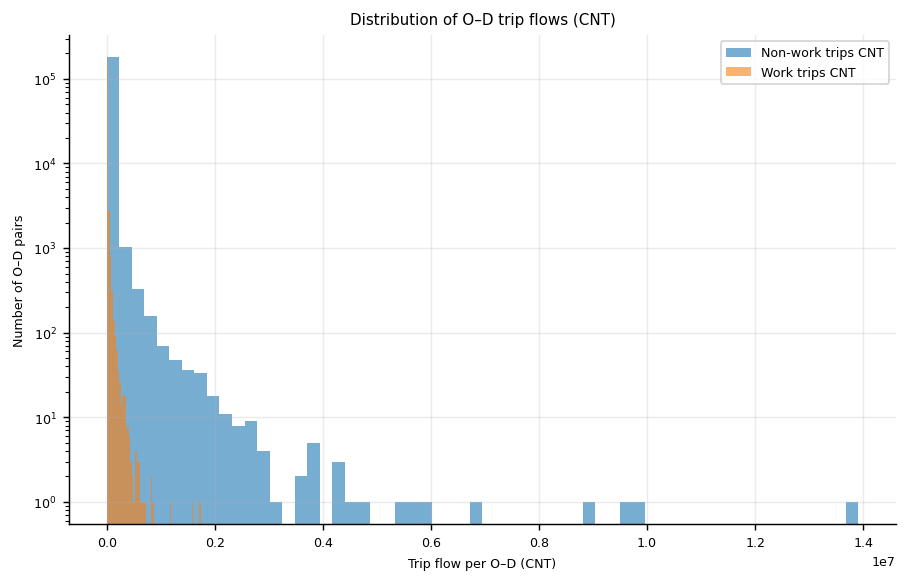

[Cell 3] Example rows (SC/PE):


,dong_cd,SC_nw,SC_w,PE_nw,PE_w,OT_nw,IT_nw,OT_w,IT_w,defacto_pop
0,11110530,15.432103,26.444967,0.519847,0.867687,10335822.82,12896501.83,1181525.98,6015553.54,25469
1,11110540,8.050622,12.606470,0.130704,0.091754,2604562.08,3242548.04,215030.94,636115.02,5994
2,11110550,19.036250,9.270658,0.133474,0.070045,3298781.23,3311255.99,673312.93,485608.84,14177
3,11110560,19.939680,9.782003,0.145489,0.081985,4585172.62,3609338.72,1123151.65,568389.02,17816
4,11110570,8.961961,5.423243,0.055946,0.036105,1697658.10,1387913.98,493042.30,250310.27,6693


In [8]:
# ============================================
# Cell 3 — Load trip datasets, plot histograms, compute SC and PE
# Files:
#  - Tij_NonworkTrips_P24567_in2023.xlsx  (columns: O_ADMDONG_CD, D_ADMDONG_CD, CNT)
#  - Tij_P1_Going_to_Work_in2023.xlsx     (columns: O_ADMDONG_CD, D_ADMDONG_CD, CNT)
#
# Definitions:
#   SC(i) = 100* T_ii / sum_j T_ij   (per origin i)
#   PE(i) = 100* sum_j T_ji / sum_{m,n} T_{mn}  (incoming share to i)
#
# Includes:
#   - CNT histograms (non-work & work)
#   - Dense T matrices (aligned to dong_ids from Cell 2/1)
#   - SC/PE per dong + distributions (unweighted & pop-weighted)
#   - Scatter of PE_nw vs PE_w
#   - Fractions and summary comparisons between PE_nw and PE_w
#   - Histogram(s) of the ratio r = PE_nw / PE_w (unweighted & pop-weighted)
# ============================================

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

nw_file = os.path.join(data_dir, "Tij_NonworkTrips_P24567_in2023.xlsx")
w_file  = os.path.join(data_dir, "Tij_P1_Going_to_Work_in2023.xlsx")

usecols_t = ["O_ADMDONG_CD", "D_ADMDONG_CD", "CNT"]
df_T_nw = pd.read_excel(nw_file, usecols=usecols_t, engine="openpyxl")
df_T_w  = pd.read_excel(w_file , usecols=usecols_t, engine="openpyxl")

# Standardize types
for dfT in (df_T_nw, df_T_w):
    dfT["O_ADMDONG_CD"] = dfT["O_ADMDONG_CD"].astype(str)
    dfT["D_ADMDONG_CD"] = dfT["D_ADMDONG_CD"].astype(str)
    dfT["CNT"] = pd.to_numeric(dfT["CNT"], errors="coerce").fillna(0.0)

print(f"[Cell 3] Trips loaded: non-work {df_T_nw.shape}, work {df_T_w.shape}")

figure_dir = "/content/drive/MyDrive/FMC_Data/M_B_dong_data_by_purpose_domestic_residents/Sharing_to_Marc/Figures_JE_created"
fig_num = 1  # Counter for figure numbering

# Histogram of CNT values (same axes)
fig = plt.figure(figsize=(7, 4.5))
plt.hist(df_T_nw["CNT"].values, bins=60, alpha=0.6, label="Non-work trips CNT")
plt.hist(df_T_w["CNT"].values,  bins=60, alpha=0.6, label="Work trips CNT")
plt.xlabel("Trip flow per O–D (CNT)")
plt.ylabel("Number of O–D pairs")
plt.title("Distribution of O–D trip flows (CNT)")
#plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.tight_layout()
plt.show()
#fig.savefig(os.path.join(figure_dir, f"cell3_fig_{fig_num:02d}_cnt_hist.pdf"))
plt.close(fig)


# ----- Build dense T matrices in the consistent dong order -----
def build_dense_T(dfT, dong_ids):
    """Return dense matrix T (n x n) in order of dong_ids."""
    idx_map = {d: i for i, d in enumerate(dong_ids)}
    n = len(dong_ids)
    T = np.zeros((n, n), dtype=float)
    for (o, d), cnt in dfT.groupby(["O_ADMDONG_CD", "D_ADMDONG_CD"])["CNT"].sum().items():
        i = idx_map.get(o); j = idx_map.get(d)
        if i is not None and j is not None:
            T[i, j] = float(cnt)
    return T

T_nw = build_dense_T(df_T_nw, dong_ids)
T_w  = build_dense_T(df_T_w,  dong_ids)

# ----- SC and PE -----
def compute_SC(T):
    """SC(i) = 100* T_ii / sum_j T_ij; 0 if OT(i)=0."""
    OT = T.sum(axis=1)  # outgoing
    diag = np.diag(T)
    with np.errstate(divide="ignore", invalid="ignore"):
        SC = np.where(OT > 0, 100* diag / OT, 0.0)
    return SC, OT

def compute_PE(T):
    """PE(i) = 100* sum_j T_ji / sum_{m,n} T_{mn}."""
    total = T.sum()
    IT = T.sum(axis=0)  # incoming per destination i
    with np.errstate(divide="ignore", invalid="ignore"):
        PE = np.where(total > 0, 100* IT / total, 0.0)
    return PE, IT, total

SC_nw, OT_nw = compute_SC(T_nw)
SC_w , OT_w  = compute_SC(T_w)
PE_nw, IT_nw, total_nw = compute_PE(T_nw)
PE_w , IT_w , total_w  = compute_PE(T_w)

# Assemble per-dong frame for later reuse
df_SC_PE = pd.DataFrame({
    "dong_cd": dong_ids,
    "SC_nw": SC_nw,
    "SC_w": SC_w,
    "PE_nw": PE_nw,
    "PE_w": PE_w,
    "OT_nw": OT_nw,
    "IT_nw": IT_nw,
    "OT_w": OT_w,
    "IT_w": IT_w
})

# Attach de facto population (for weighting)
df_SC_PE = df_SC_PE.merge(
    df_pop[["dong_cd", "defacto_pop"]],
    on="dong_cd", how="left"
)
pop_ordered = df_SC_PE["defacto_pop"].astype(float).to_numpy()
pop_ordered = np.where(np.isfinite(pop_ordered) & (pop_ordered > 0), pop_ordered, 0.0)
tot_pop = pop_ordered.sum()
if tot_pop <= 0:
    print("[Cell 3][WARN] All de facto populations are zero/NaN; population-weighted plots will equal unweighted.")

print("[Cell 3] Example rows (SC/PE):")
display(df_SC_PE.head())



Saved PDF: /content/drive/MyDrive/FMC_Data/Combined_Figure/cell3_fig_01_SCPE_unweighted_final.pdf
Saved JPG: /content/drive/MyDrive/FMC_Data/Combined_Figure/cell3_fig_01_SCPE_unweighted_final.jpg


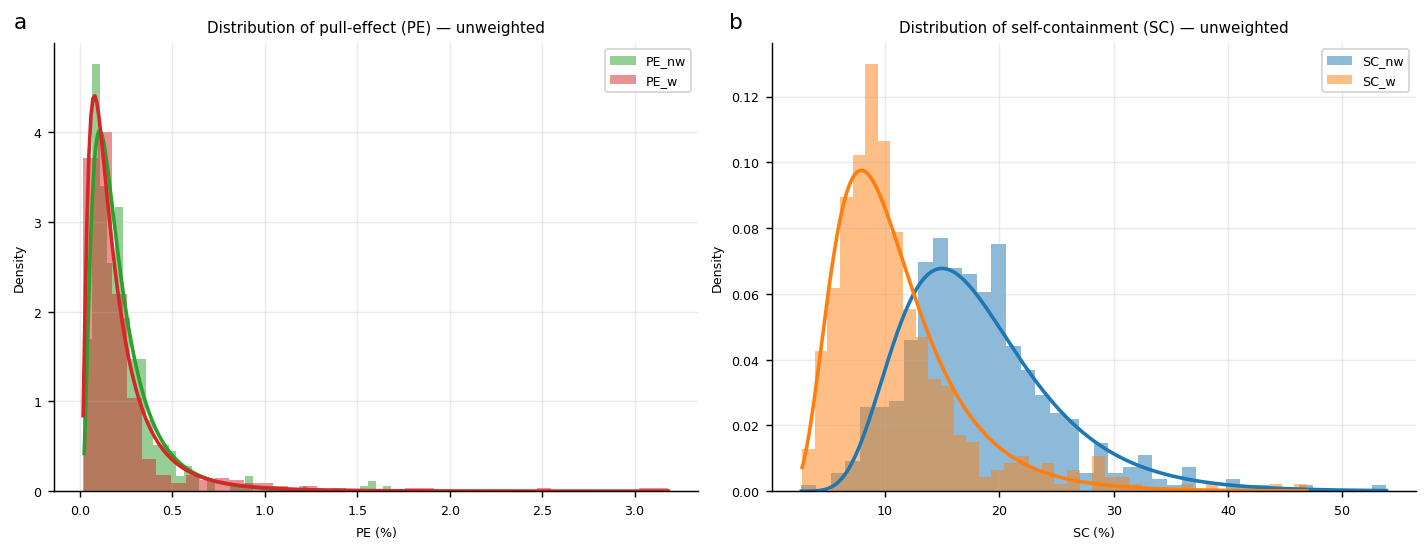

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------------
# [Setup] 경로 및 저장 설정
# ---------------------------------------------------------
# 기존 코드에 있던 경로 변수 (환경에 맞게 수정 가능)
figure_dir = "/content/drive/MyDrive/FMC_Data/Combined_Figure"
fig_num = 1  # 파일명 번호 지정

# 저장할 폴더가 없으면 생성 (에러 방지)
os.makedirs(figure_dir, exist_ok=True)


# ---------------------------------------------------------
# [Helper Functions] Lognormal PDF & Plotting
# ---------------------------------------------------------
def lognorm_pdf(x, mu, sigma):
    """Calculate Lognormal PDF"""
    with np.errstate(divide='ignore', invalid='ignore'):
        pdf = (1 / (x * sigma * np.sqrt(2 * np.pi))) * np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))
    return pdf

def plot_lognorm_fit(ax, data, color_code):
    """Fits unweighted lognormal and plots the curve with Figure 1 style"""
    valid_data = data[data > 0]
    if len(valid_data) == 0: return

    # Estimate parameters
    log_data = np.log(valid_data)
    mu = np.mean(log_data)
    sigma = np.std(log_data)

    # Generate smooth curve
    x = np.linspace(valid_data.min(), valid_data.max(), 300)
    y = lognorm_pdf(x, mu, sigma)

    # Plot Line (Same color, lw=2 for Figure 1 style)
    ax.plot(x, y, color=color_code, lw=2)


# ---------------------------------------------------------
# [Plotting]
# ---------------------------------------------------------
fig, axs = plt.subplots(1, 2, figsize=(11, 4.2))

# --- [Left Panel] Pull-Effect (PE) ---
# Colors: Non-work = Green (C2), Work = Red (C3)
axs[0].hist(PE_nw, bins=40, density=True, alpha=0.5, label="PE_nw", color="C2")
axs[0].hist(PE_w , bins=40, density=True, alpha=0.5, label="PE_w",  color="C3")

plot_lognorm_fit(axs[0], PE_nw, "C2")
plot_lognorm_fit(axs[0], PE_w,  "C3")

axs[0].set_xlabel(r"$\mathrm{PE}$ (%)")
axs[0].set_ylabel("Density")
axs[0].set_title("Distribution of pull-effect (PE) — unweighted")
axs[0].legend()

# --- [Right Panel] Self-Containment (SC) ---
# Colors: Non-work = Blue (C0), Work = Orange (C1)
axs[1].hist(SC_nw, bins=40, density=True, alpha=0.5, label="SC_nw", color="C0")
axs[1].hist(SC_w , bins=40, density=True, alpha=0.5, label="SC_w",  color="C1")

plot_lognorm_fit(axs[1], SC_nw, "C0")
plot_lognorm_fit(axs[1], SC_w,  "C1")

axs[1].set_xlabel(r"$\mathrm{SC}$ (%)")
axs[1].set_ylabel("Density")
axs[1].set_title("Distribution of self-containment (SC) — unweighted")
axs[1].legend()

# --- [Panel Labels] ---
# a: Left, b: Right
fig.text(0.01, 0.99, 'a', fontsize=12, ha='left', va='top', family='sans-serif')
fig.text(0.51, 0.99, 'b', fontsize=12, ha='left', va='top', family='sans-serif')

plt.tight_layout()

# ---------------------------------------------------------
# [Saving] PDF & JPG (300 DPI)
# ---------------------------------------------------------
# 파일명 정의
filename_base = f"cell3_fig_{fig_num:02d}_SCPE_unweighted_final"

# 1. PDF 저장
pdf_path = os.path.join(figure_dir, f"{filename_base}.pdf")
fig.savefig(pdf_path, format='pdf', bbox_inches='tight')

# 2. JPG 저장 (300 DPI)
jpg_path = os.path.join(figure_dir, f"{filename_base}.jpg")
fig.savefig(jpg_path, format='jpg', dpi=300, bbox_inches='tight')

print(f"Saved PDF: {pdf_path}")
print(f"Saved JPG: {jpg_path}")

plt.show()
plt.close(fig)

# 다음 번호를 위해 카운터 증가
fig_num += 1